<a href="https://colab.research.google.com/github/Anirudhsatheesh/AI/blob/main/Machine%20learning/Regression_(Linear%2Cpolynomial%2CL1%2CL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear regression on salary data using sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/salary_data.csv')
data.columns = ["Experience", "Salary"]
data.head()

,Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.predict(X_test)

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [ ]:
Y_Pred = regressor.predict(X_test)

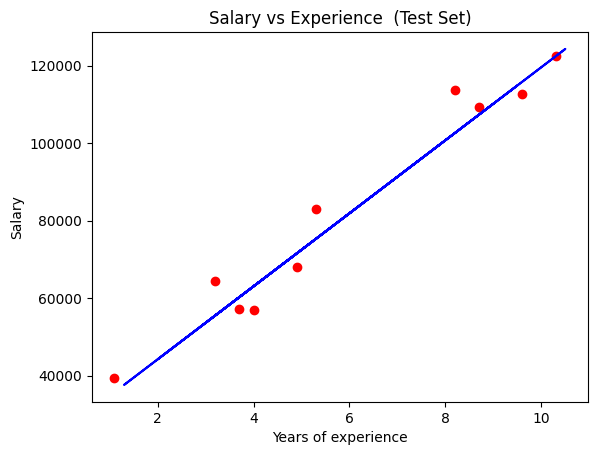

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience  (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
con= pd.DataFrame({'Actual': y_test, 'Predicted': Y_Pred})
con

,Actual,Predicted
0,112635,115814.307562
1,67938,71511.925348
2,113812,102617.853286
3,83088,75282.340855
4,64445,55487.659440
5,57189,60200.678825
6,122391,122412.534701
7,109431,107330.872670
8,56957,63028.490456
9,39343,35692.978025


In [ ]:
regressor.coef_ # m

array([9426.03876907])

In [ ]:
regressor.intercept_ # c

25324.33537924433

In [ ]:
regressor.score(X_test, y_test)

0.9553063138044949

In [ ]:
regressor.score(X_train, y_train)

0.9549236946181227

In [ ]:
# Accuracy metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def error_metrics(y, y_hat):
  print("MSE", mean_squared_error(y, y_hat))
  print("MAE", mean_absolute_error(y, y_hat))
  print("Score", r2_score(y, y_hat))

In [ ]:
error_metrics(y_test, Y_Pred)

MSE 35301898.887134895
MAE 4956.5232614449005
Score 0.9553063138044949


##L1,L2

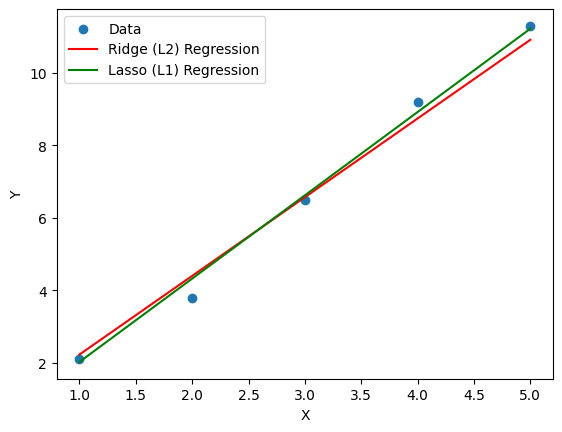

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 3.8, 6.5, 9.2, 11.3])
y


X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b



def lasso_regression(X, y, alpha, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(num_iterations):
        y_pred = X.dot(theta)
        gradient = (X.T.dot(y_pred - y) + alpha * np.sign(theta)) / m
        theta -= learning_rate * gradient
    return theta


def ridge_regression(X, y, alpha, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(num_iterations):
        y_pred = X.dot(theta)
        gradient = (X.T.dot(y_pred - y) + alpha * theta) / m
        theta -= learning_rate * gradient
    return theta


alpha_ridge = 1.0
alpha_lasso = 0.1
num_iterations = 1000
learning_rate = 0.01


theta_ridge = ridge_regression(X_b, y, alpha_ridge, num_iterations, learning_rate)
theta_lasso = lasso_regression(X_b, y, alpha_lasso, num_iterations, learning_rate)



plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta_ridge), label=f'Ridge (L2) Regression', color='red')
plt.plot(X, X_b.dot(theta_lasso), label=f'Lasso (L1) Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##Polinomial Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X=dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [ ]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

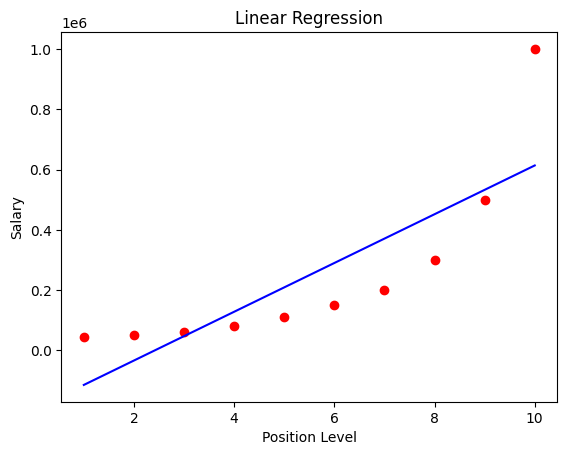

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

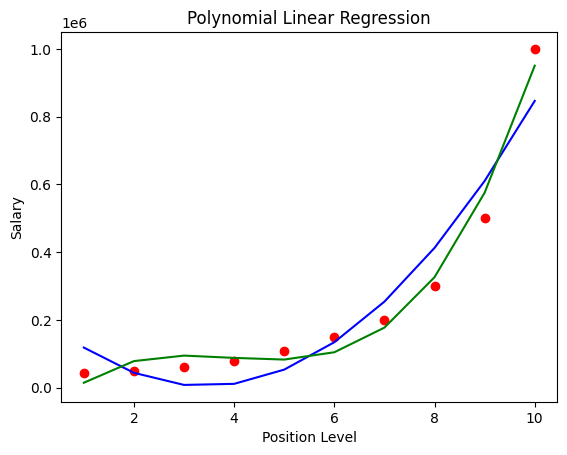

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [ ]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [ ]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Real%20estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.shape


(414, 8)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data.corr()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

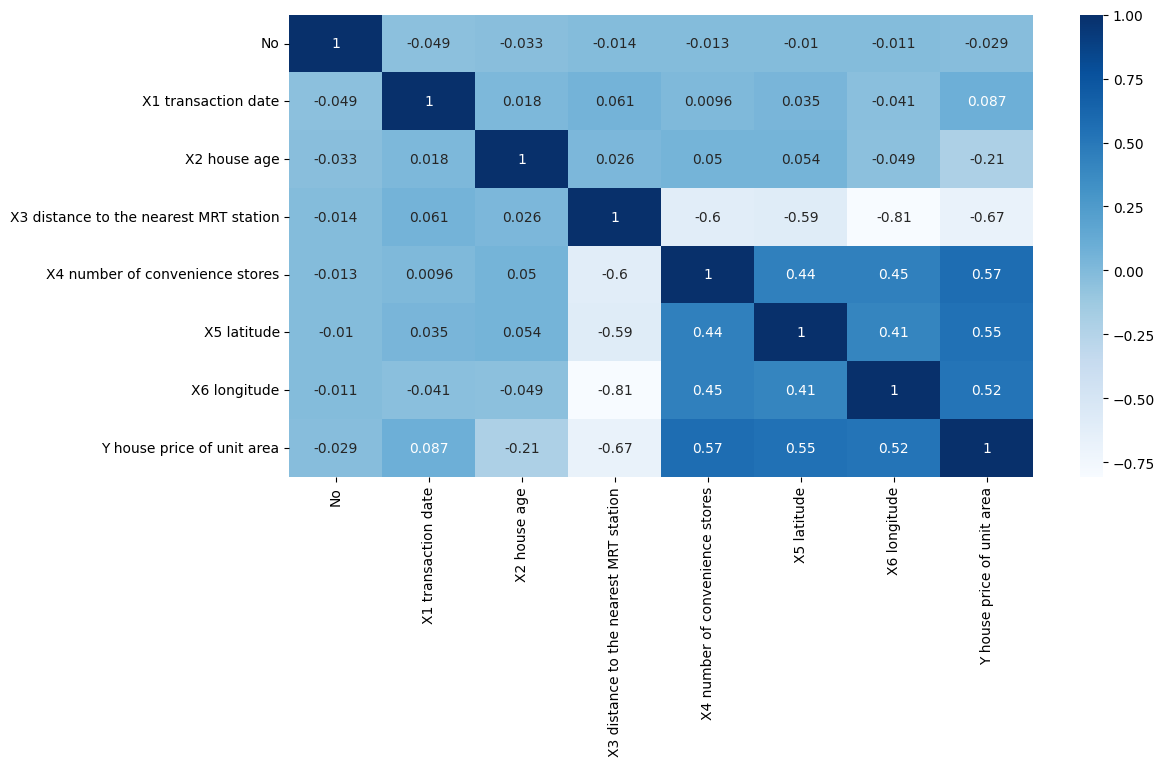

In [ ]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data.corr(),annot=True, cmap="Blues",)

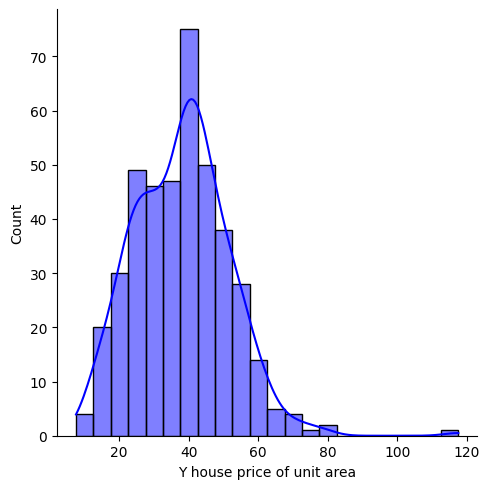

In [ ]:
sns.displot(data=data, x='Y house price of unit area', kde=True , color='b')

In [ ]:
X= data.drop('Y house price of unit area',axis=1)

X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
y= data['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
polynomial_reg= PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_feat=polynomial_reg.fit_transform(X)
poly_feat.shape

(414, 35)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

In [ ]:
polymodel=LinearRegression()

In [ ]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=polymodel.predict(X_test)

In [ ]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.382290,2.817710
347,11.2,3.929467,7.270533
307,24.7,17.438173,7.261827
299,46.1,47.146074,-1.046074
391,31.3,27.340929,3.959071


In [ ]:
Poly_MAE = metrics.mean_absolute_error(y_test,y_pred)
Poly_MSE = metrics.mean_squared_error(y_test,y_pred)
Poly_RMSE = np.sqrt(Poly_MSE)

pd.DataFrame([Poly_MAE, Poly_MSE ,Poly_RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.490908
MSE,32.402925
RMSE,5.692357
